In [2]:
import pandas as pd
import numpy as np
import sys
import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
dataset=pd.read_csv('Dataset.csv',header=None,names=['x','y'])
data_array=np.array(dataset)

In [3]:
def comp(x):
    return x[0]
def K(a,b,d):
    return(1+np.dot(a,b.transpose()))**d
def eigvalvec(kernal_matrix): 
    p=[]
    Beta_val,Beta_vec=np.linalg.eig(kernal_matrix)
    Beta_vec = Beta_vec.transpose()
    for i in range(0,1000):
        temp=[Beta_val[i],Beta_vec[i]]
        p.append(temp)
    p.sort(reverse=True,key=comp)
    return p

In [4]:
kernal_matrix=np.zeros(shape=(1000,1000))
for i in range(0,1000):
    for j in range(0,1000):
        kernal_matrix[i][j]=K(data_array[i],data_array[j],2)
def kernal_matrix_centering(km):
    mat_one=np.ones(shape=(1000,1000))
    I=np.identity(1000)
    mat_one=mat_one/1000
    diff=I-mat_one
    temp=np.dot(diff,km)
    kernal_matrix=np.dot(temp,diff)
    return kernal_matrix
kernal_matrix=kernal_matrix_centering(kernal_matrix)
p=eigvalvec(kernal_matrix)
top_eig=np.zeros(shape=(4,1000))
for i in range(0,4):
    top_eig[i]=p[i][1]
top_eig=top_eig.transpose()
for i in range(1000):
    top_eig[i]=top_eig[i]/np.linalg.norm(top_eig[i])

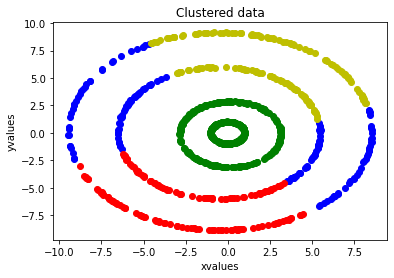

In [5]:
z=np.zeros(shape=[1000,1])
for i in range(0,1000):
    z[i]=random.randint(0,3)
mean_array=np.zeros(shape=[4,4])
def calc_clustermean(k):
    sum_z=np.zeros(shape=(4))
    c=0
    for i in range(0,1000):
        if(z[i]==k):
            sum_z=sum_z+top_eig[i]
            c=c+1
    z_mean=sum_z/c
    return z_mean
mean_array[0]=calc_clustermean(0)
mean_array[1]=calc_clustermean(1)
mean_array[2]=calc_clustermean(2)
mean_array[3]=calc_clustermean(3)

while True:
    change=False
    for i in range(0,1000):
        d0=np.linalg.norm(top_eig[i]-mean_array[0])
        d1=np.linalg.norm(top_eig[i]-mean_array[1])
        d2=np.linalg.norm(top_eig[i]-mean_array[2])
        d3=np.linalg.norm(top_eig[i]-mean_array[3])
        min_d=min(d0,d1,d2,d3)
        if(min_d==d0):
            cluster=0
        if(min_d==d1):
            cluster=1
        if(min_d==d2):
            cluster=2
        if(min_d==d3):
            cluster=3

        if(z[i]==0):
            if(min_d<np.linalg.norm(top_eig[i]-mean_array[0])):
                z[i]=cluster
                mean_array[0]=calc_clustermean(0)
                mean_array[1]=calc_clustermean(1)
                mean_array[2]=calc_clustermean(2)
                mean_array[3]=calc_clustermean(3)
                change=True
        elif(z[i]==1):
            if(min_d<np.linalg.norm(top_eig[i]-mean_array[1])):
                z[i]=cluster
                mean_array[0]=calc_clustermean(0)
                mean_array[1]=calc_clustermean(1)
                mean_array[2]=calc_clustermean(2)
                mean_array[3]=calc_clustermean(3)
                change=True
        elif(z[i]==2):
            if(min_d<np.linalg.norm(top_eig[i]-mean_array[2])):
                z[i]=cluster
                mean_array[0]=calc_clustermean(0)
                mean_array[1]=calc_clustermean(1)
                mean_array[2]=calc_clustermean(2)
                mean_array[3]=calc_clustermean(3)
                change=True
        else:
            if(min_d<np.linalg.norm(top_eig[i]-mean_array[3])):
                z[i]=cluster
                mean_array[0]=calc_clustermean(0)
                mean_array[1]=calc_clustermean(1)
                mean_array[2]=calc_clustermean(2)
                mean_array[3]=calc_clustermean(3)
                change=True
    if(change==False):
        break
import matplotlib.colors as mcolors
for i in range(0,1000):
    if(z[i]==0):
        plt.scatter(data_array[i][0],data_array[i][1],c='r')
    if(z[i]==1):
        plt.scatter(data_array[i][0],data_array[i][1],c='b')
    if(z[i]==2):
        plt.scatter(data_array[i][0],data_array[i][1],c='g')
    if(z[i]==3):
        plt.scatter(data_array[i][0],data_array[i][1],c='y')
plt.title("Clustered data")
plt.xlabel("xvalues")
plt.ylabel("yvalues")
plt.show()